# Extracting features using Principal Components Analysis (PCA)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from glob import glob

In [12]:
#load numpy zip
data = np.load('./data_100_100_norm.npz')

In [13]:
data.files

['arr_0', 'arr_1']

In [14]:
X = data['arr_0'] #independent features
Y = data['arr_1'] #target value

In [16]:
X.shape, Y.shape

((5461, 10000), (5461,))

# Eigen Image creation

In [17]:
X1 = X - X.mean(axis=0)

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=None, whiten = True, svd_solver='auto')

In [20]:
x_pca = pca.fit_transform(X1)

In [21]:
x_pca.shape

(5461, 5461)

In [22]:
eigen_ratio = pca.explained_variance_ratio_
eigen_ratio_cum = np.cumsum(eigen_ratio)

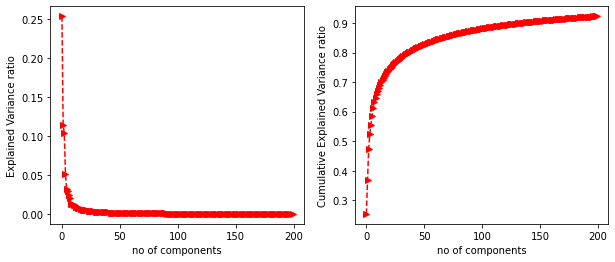

In [23]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(eigen_ratio[:200],'r>--')
plt.xlabel('no of components')
plt.ylabel('Explained Variance ratio')
plt.subplot(1,2,2)
plt.xlabel('no of components')
plt.ylabel('Cumulative Explained Variance ratio')
plt.plot(eigen_ratio_cum[:200],'r>--')
plt.show()

conclusion: using elbow method, consider number of components is between 25 - 30
> since if I consider component between 25 to 30 the explained variance is around 75%.
> So, in order to get min 80% variance I am considering 50 components

In [25]:
pca_50 = PCA(n_components = 50, whiten = True, svd_solver = 'auto')
x_pca_50 = pca_50.fit_transform(X1)

In [26]:
x_pca_50.shape

(5461, 50)

In [27]:
import pickle

In [28]:
pickle.dump(pca_50,open('./model/pca_50.pickle','wb'))

In [29]:
#consider 50 component and inverse transform
x_pca_inv = pca_50.inverse_transform(x_pca_50)

In [30]:
x_pca_inv.shape

(5461, 10000)

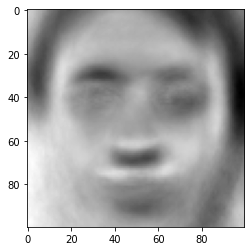

In [33]:
#consider one image (ome row)
eig_img = x_pca_inv[0,:]
eig_img = eig_img.reshape((100,100))
plt.imshow(eig_img, cmap ='gray')

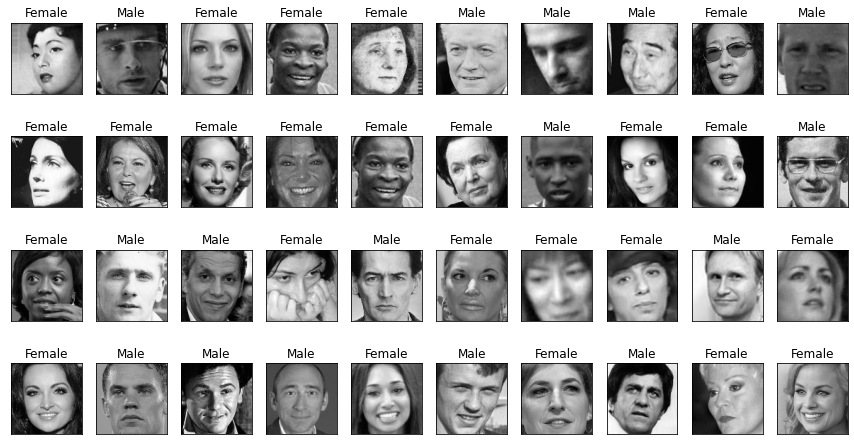

====================Eigen Images====================


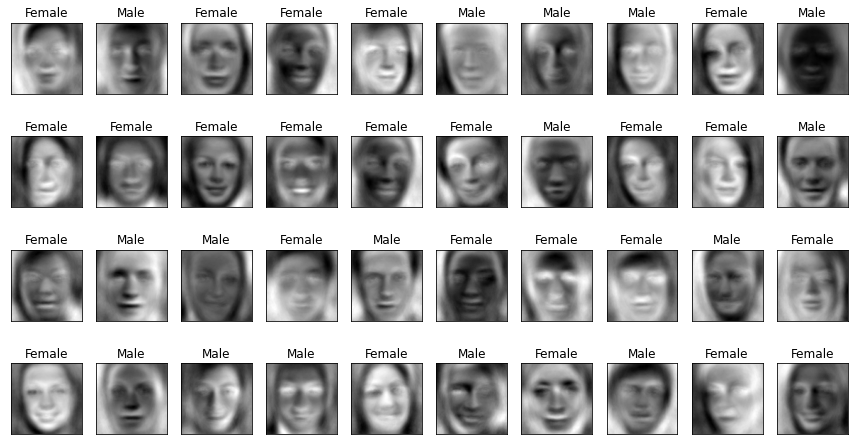

In [34]:
def label(Y):
    if Y==0:
        return 'Male'
    else:
        return 'Female'
    
np.random.randint(1001)
pics = np.random.randint(0,5451,40)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = X[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(label(Y[pic])))
    plt.xticks([])
    plt.yticks([])
plt.show()

print("="*20+'Eigen Images'+"="*20)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = x_pca_inv[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(label(Y[pic])))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [36]:
# saving 
np.savez('./data_pca_50_y_mean.pickle',x_pca_50,Y,X.mean(axis=0))